# PROJECT NAME: ANALYSE DAILY WEATHER DATA
###~SRITEJA KATTEKOLA


## Importing the dependencies

In [271]:
#importing the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

## Data Preprocessing

In [32]:
#loading the data
weather_data=pd.read_csv("/content/weather.csv")

In [33]:
#Data Exploration
weather_data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [34]:
weather_data.info()
weather_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [36]:
weather_data.shape

(366, 22)

## Finding dependencies between features

In [37]:
#correlation between the variables
weather_data.corr()

<ipython-input-37-14e5babb9f43>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  weather_data.corr()


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.752471,0.201939,0.649930,0.035711,0.218020,0.127542,-0.065922,-0.207897,-0.040709,-0.501707,-0.498007,0.215776,0.118397,0.916745,0.722730,0.218551
MaxTemp,0.752471,1.000000,-0.073560,0.690026,0.452064,0.109672,-0.216814,-0.167873,-0.359602,-0.533327,-0.290883,-0.379394,-0.175730,-0.135991,0.870604,0.989261,0.027557
Rainfall,0.201939,-0.073560,1.000000,-0.007293,-0.150990,0.096190,0.219637,0.056008,0.150109,0.289013,-0.331581,-0.250218,0.180046,0.127792,0.077299,-0.087493,0.089860
Evaporation,0.649930,0.690026,-0.007293,1.000000,0.318025,0.288477,0.068929,0.048601,-0.519587,-0.391780,-0.381906,-0.391093,-0.106007,-0.100045,0.707676,0.671632,0.076762
Sunshine,0.035711,0.452064,-0.150990,0.318025,1.000000,0.095843,-0.064522,0.072573,-0.499017,-0.759429,0.006276,-0.036201,-0.681092,-0.661131,0.219509,0.470447,-0.378823
WindGustSpeed,0.218020,0.109672,0.096190,0.288477,0.095843,1.000000,0.527653,0.693945,-0.349793,-0.069439,-0.540180,-0.526885,-0.012666,0.050230,0.256223,0.072501,0.251991
WindSpeed9am,0.127542,-0.216814,0.219637,0.068929,-0.064522,0.527653,1.000000,0.472966,-0.270623,0.146657,-0.356332,-0.247952,0.101842,-0.022471,0.064074,-0.235186,0.039091
WindSpeed3pm,-0.065922,-0.167873,0.056008,0.048601,0.072573,0.693945,0.472966,1.000000,-0.266092,-0.026368,-0.359800,-0.337325,-0.026426,0.007207,-0.017766,-0.187570,-0.009447
Humidity9am,-0.207897,-0.359602,0.150109,-0.519587,-0.499017,-0.349793,-0.270623,-0.266092,1.000000,0.546718,0.135727,0.134420,0.392842,0.271938,-0.436551,-0.355119,0.165931
Humidity3pm,-0.040709,-0.533327,0.289013,-0.391780,-0.759429,-0.069439,0.146657,-0.026368,0.546718,1.000000,-0.087946,-0.010052,0.551633,0.510108,-0.255681,-0.581676,0.358752


In [38]:
weather_data['MaxTemp'].value_counts()

14.8    5
20.9    5
12.2    5
15.5    5
11.6    5
       ..
17.1    1
30.3    1
35.8    1
21.2    1
30.7    1
Name: MaxTemp, Length: 187, dtype: int64

In [39]:
weather_data['WindGustDir'].value_counts()

NW     73
NNW    44
E      37
WNW    35
ENE    30
ESE    23
S      22
N      21
W      20
NE     16
SSE    12
SE     12
NNE     8
SSW     5
SW      3
WSW     2
Name: WindGustDir, dtype: int64

In [40]:
#missing values in dataset
weather_data.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

## Splitting Dataset into Features and Target

In [225]:
#splitting the features and target
weather_data=pd.DataFrame(weather_data)
X=weather_data.iloc[:,1:21]
Y=weather_data.iloc[:,21:]

In [226]:
X

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,20,68,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6
1,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,17,80,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6
2,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,6,82,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8
3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,24,62,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8
4,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,28,68,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,50,38,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0
362,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,19,45,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0
363,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,9,63,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0
364,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,28,69,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0


In [227]:
Y

,21
0,Yes
1,Yes
2,Yes
3,Yes
4,No
...,...
361,No
362,No
363,No
364,No


## Data Handling

In [228]:
#Handling the missing values
impute=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
X=impute.fit_transform(X)
Y=impute.fit_transform(Y)

In [229]:
#missing values in dataset
X


array([[24.3, 0.0, 3.4, ..., 23.6, 'No', 3.6],
       [26.9, 3.6, 4.4, ..., 25.7, 'Yes', 3.6],
       [23.4, 3.6, 5.8, ..., 20.2, 'Yes', 39.8],
       ...,
       [19.9, 0.0, 8.4, ..., 18.3, 'No', 0.0],
       [26.9, 0.0, 5.0, ..., 25.9, 'No', 0.0],
       [30.2, 0.0, 6.0, ..., 28.6, 'No', 0.0]], dtype=object)

In [230]:
X[:,16]

array([14.4, 17.5, 15.4, 13.5, 11.1, 10.9, 12.4, 12.1, 14.1, 13.3, 14.6,
       16.8, 17.0, 19.7, 18.7, 19.1, 20.2, 20.1, 20.2, 22.8, 22.2, 16.5,
       14.0, 17.8, 16.8, 19.8, 16.5, 18.8, 18.9, 17.3, 17.0, 16.7, 20.5,
       18.8, 18.6, 18.6, 21.5, 18.0, 20.6, 19.3, 13.8, 15.7, 15.8, 15.8,
       17.4, 16.6, 15.3, 15.3, 16.1, 15.3, 21.0, 20.6, 14.9, 15.0, 12.4,
       15.3, 19.8, 18.3, 21.5, 23.4, 21.9, 21.9, 23.0, 19.2, 20.3, 18.6,
       18.9, 20.8, 18.1, 19.3, 21.3, 24.7, 23.6, 23.0, 17.0, 18.0, 24.5,
       17.1, 17.8, 18.0, 19.4, 17.4, 14.7, 16.2, 17.0, 17.6, 18.3, 19.7,
       22.4, 19.8, 22.2, 21.4, 16.5, 19.1, 21.7, 18.5, 18.4, 18.7, 17.9,
       13.6, 13.8, 14.0, 14.6, 15.8, 16.3, 13.7, 15.0, 15.3, 15.4, 17.2,
       16.9, 17.4, 17.5, 16.5, 15.7, 15.1, 15.8, 17.4, 17.6, 15.7, 10.6,
       11.7, 12.2, 13.8, 15.6, 15.7, 17.4, 17.5, 14.0, 17.8, 17.2, 20.2,
       17.5, 16.1, 17.9, 21.4, 18.2, 17.7, 16.8, 19.7, 17.1, 13.3, 14.0,
       15.5, 17.1, 16.4, 15.1, 8.4, 9.2, 8.8, 11.2,

## Data Encoding






In [231]:
#data Encoding

lel=LabelEncoder()
X[:,4]=lel.fit_transform(X[:,4])
lel4=LabelEncoder()
X[:,6]=lel4.fit_transform(X[:,6])
lel1=LabelEncoder()
X[:,7]=lel1.fit_transform(X[:,7])
lel3=LabelEncoder()
X[:,18]=lel3.fit_transform(X[:,18])
lel8=LabelEncoder()
Y[:,-1]=lel8.fit_transform(Y[:,-1])

In [232]:
X

array([[24.3, 0.0, 3.4, ..., 23.6, 0, 3.6],
       [26.9, 3.6, 4.4, ..., 25.7, 1, 3.6],
       [23.4, 3.6, 5.8, ..., 20.2, 1, 39.8],
       ...,
       [19.9, 0.0, 8.4, ..., 18.3, 0, 0.0],
       [26.9, 0.0, 5.0, ..., 25.9, 0, 0.0],
       [30.2, 0.0, 6.0, ..., 28.6, 0, 0.0]], dtype=object)

In [233]:
Y

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
    

In [234]:
Y=np.array(Y,dtype=float)
print(Y)

[[1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.

## Feature Scaling

In [235]:
#Feature Scaling
scaler=StandardScaler()
X=scaler.fit_transform(X)

## Splitting into Training and Testing data

In [236]:
#train test split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [237]:
X_train

array([[-0.93547788,  0.27762521,  1.90497001, ..., -0.8340598 ,
         2.13200716, -0.33848522],
       [-0.15719431, -0.33848522, -0.19576524, ..., -0.04989608,
        -0.46904158,  3.5003567 ],
       [-0.66607202, -0.33848522, -0.57089653, ..., -0.60785873,
        -0.46904158, -0.33848522],
       ...,
       [ 0.83062715, -0.33848522,  0.85460239, ...,  1.00570892,
        -0.46904158, -0.33848522],
       [-1.35455364, -0.33848522, -0.64592279, ..., -1.22614166,
        -0.46904158, -0.33848522],
       [-1.4293886 , -0.29109211, -1.02105409, ..., -1.58806338,
        -0.46904158,  4.21125336]])

In [238]:
#size of training and testing dataset
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(292, 20) (74, 20) (292, 1) (74, 1)


In [239]:
Y_train

array([[0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],

## Model Building

In [240]:
#RandomForestClassifier
model=RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(X_train,Y_train)

<ipython-input-240-9990fafd031f>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train,Y_train)


RandomForestClassifier(random_state=0)

In [241]:
model.score(X_train,Y_train)

1.0

## Evaluating the model

In [242]:
#testing the model
pred=model.predict(X_test)
acc=accuracy_score(Y_test,pred)
print("accuracy on testing dataset : ",acc)

accuracy on testing dataset :  1.0


In [246]:
print(pred)

['No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'Yes']


In [252]:
print(Y_test)
print(Y_test.shape,pred.shape)

['No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No'
 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes'
 'No' 'No' 'No' 'Yes']
(74,) (74,)


In [253]:
df=np.concatenate((Y_test.reshape(-1,1),pred.reshape(-1,1)),axis=1)
dataframe=pd.DataFrame(df,columns=['Rain on Tommorrow', 'Prediction of Rain'])

## crosschecking the predictions

In [254]:
print(dataframe)

   Rain on Tommorrow Prediction of Rain
0                 No                 No
1                 No                 No
2                 No                 No
3                Yes                Yes
4                 No                 No
..               ...                ...
69               Yes                Yes
70                No                 No
71                No                 No
72                No                 No
73               Yes                Yes

[74 rows x 2 columns]


In [256]:
accuracy_score(Y_test,pred)

1.0

## visualizing

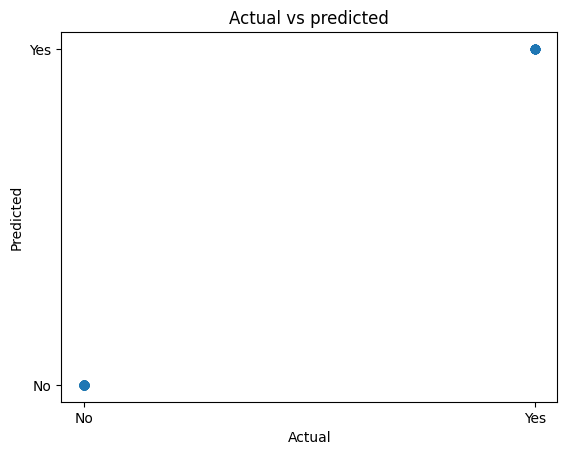

In [270]:
#visualize the actual and predicted values
plt.scatter(Y_test,pred)
plt.xlabel("Actual")
plt.ylabel('Predicted')
plt.title("Actual vs predicted")
plt.show()